# Student Scores: Modeling Writing Scores

# Load Required Python Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from pprint import pprint

%matplotlib inline

/Users/tiffanyflor/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


**Locate and print current working directory and parent directory.**

In [2]:
path = os.getcwd()
parent = os.path.dirname(path)
figures_folder = parent+'/figures'
print(path)
print(parent)
print(figures_folder)

/Users/tiffanyflor/Dropbox/MyProjects/Student Scores/notebooks
/Users/tiffanyflor/Dropbox/MyProjects/Student Scores
/Users/tiffanyflor/Dropbox/MyProjects/Student Scores/figures


**Print contents of data/interim.**

In [3]:
os.listdir(parent+'/data/interim')

['total_student_scores_without_dummies.csv',
 'cleaned_student_scores.csv',
 'student_scores_no_outliers.csv',
 'total_student_scores_dummies.csv',
 '.ipynb_checkpoints']

# Load Data

In [4]:
df = pd.read_csv(parent+'/data/interim/total_student_scores_dummies.csv',index_col=0)

In [5]:
df.head()

,test preparation course,education,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,Pass Mean Exam,Pass Math,Pass Reading,Pass Writing
0,0,1,0,1,0,0,0,1,0,0,0,0,1,pass,pass,pass,pass
1,1,1,0,0,1,0,0,0,0,0,1,0,1,pass,fail,pass,pass
2,0,1,0,1,0,0,0,0,0,1,0,0,1,pass,pass,pass,pass
3,0,1,1,0,0,0,0,0,0,0,0,0,0,fail,fail,fail,fail
4,0,1,1,0,1,0,0,0,0,0,1,0,1,pass,pass,pass,pass


In [6]:
df.tail()

,test preparation course,education,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,Pass Mean Exam,Pass Math,Pass Reading,Pass Writing
9945,1,1,0,0,0,0,1,0,0,0,1,0,1,pass,pass,pass,pass
9946,0,1,0,0,0,1,0,0,0,0,1,0,0,fail,fail,fail,fail
9947,1,1,1,0,0,0,0,0,0,0,0,0,0,pass,pass,pass,pass
9948,1,1,0,0,0,1,0,0,0,0,0,0,0,fail,fail,fail,pass
9949,1,1,0,0,0,1,0,1,0,0,0,0,1,pass,pass,pass,pass


In [7]:
df.shape

(9950, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9950 entries, 0 to 9949
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   test preparation course                        9950 non-null   int64 
 1   education                                      9950 non-null   int64 
 2   gender_male                                    9950 non-null   int64 
 3   race/ethnicity_group B                         9950 non-null   int64 
 4   race/ethnicity_group C                         9950 non-null   int64 
 5   race/ethnicity_group D                         9950 non-null   int64 
 6   race/ethnicity_group E                         9950 non-null   int64 
 7   parental level of education_bachelor's degree  9950 non-null   int64 
 8   parental level of education_high school        9950 non-null   int64 
 9   parental level of education_master's degree    9950 non-null   

In [9]:
df.columns

Index(['test preparation course', 'education', 'gender_male',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_standard',
       'Pass Mean Exam', 'Pass Math', 'Pass Reading', 'Pass Writing'],
      dtype='object')

In [10]:
df['Pass Mean Exam'].value_counts()

fail    5259
pass    4691
Name: Pass Mean Exam, dtype: int64

In [11]:
df['Pass Math'].value_counts()

fail    5618
pass    4332
Name: Pass Math, dtype: int64

In [12]:
df['Pass Reading'].value_counts()

pass    5054
fail    4896
Name: Pass Reading, dtype: int64

In [13]:
df['Pass Writing'].value_counts()

fail    5178
pass    4772
Name: Pass Writing, dtype: int64

Notice that the split between students who fail and those who pass is roughly equal between each group. There is no major skew.

When looking at models we know that anywhere between 43% to 56% can be achieved by predicting all passing or all failing. Therefore, we are interested in finding a model that has a much higher rating than the dummy model.

## Label Encoder
Performing manually to ensure proper encoding for the question:
Does this student need to be recommended the prep course?
1 (Yes) == fail
0 (No) == pass

In [14]:
df['Recommend Prep Course'] = [1 if x== 'fail' else 0 for x in df['Pass Writing']]

In [15]:
df['Recommend Prep Course'].head()

0    0
1    0
2    0
3    1
4    0
Name: Recommend Prep Course, dtype: int64

# Writing Exam Prediction: Split into Train and Test Data

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop(['Pass Mean Exam','Pass Math','Pass Reading','Pass Writing','Recommend Prep Course'], axis=1)

# Split up various predicted variables
y_recommend = df['Recommend Prep Course']

X_train, X_test, y_train, y_test = train_test_split(X,y_recommend,test_size=0.2,random_state=42)

In [17]:
# examine data details
X.describe().T

,count,mean,std,min,25%,50%,75%,max
test preparation course,9950.0,0.342010,0.474407,0.0,0.0,0.0,1.0,1.0
education,9950.0,0.617387,0.486049,0.0,0.0,1.0,1.0,1.0
gender_male,9950.0,0.504623,0.500004,0.0,0.0,1.0,1.0,1.0
race/ethnicity_group B,9950.0,0.199799,0.399869,0.0,0.0,0.0,0.0,1.0
race/ethnicity_group C,9950.0,0.314774,0.464449,0.0,0.0,0.0,1.0,1.0
race/ethnicity_group D,9950.0,0.262915,0.440239,0.0,0.0,0.0,1.0,1.0
race/ethnicity_group E,9950.0,0.139598,0.346587,0.0,0.0,0.0,0.0,1.0
parental level of education_bachelor's degree,9950.0,0.117588,0.322136,0.0,0.0,0.0,0.0,1.0
parental level of education_high school,9950.0,0.196281,0.397204,0.0,0.0,0.0,0.0,1.0
parental level of education_master's degree,9950.0,0.071759,0.258101,0.0,0.0,0.0,0.0,1.0


# Models Building & Performance Evaluation
Thank you to [Roberto Salazar](https://towardsdatascience.com/machine-learning-classifiers-comparison-with-python-33149aecdbca) for sharing code to streamline this process and present all performance metrics in one dataframe.

In [18]:
# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score),
          'precision':make_scorer(precision_score),
          'recall':make_scorer(recall_score),
          'f1_score':make_scorer(f1_score)}

In [19]:
# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

### K-Nearest Neighbors: Determine K

In [20]:
# Using error rate, evaluate best k

error_rate = []

# range between 1 and sqrt(rows)
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

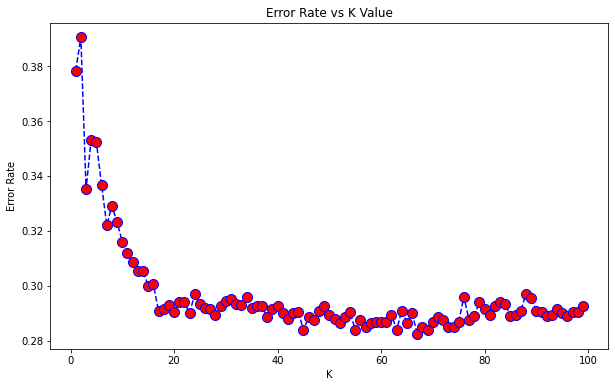

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue',linestyle='dashed',
         marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [22]:
min_level = min(error_rate)

min_k = 0
for i in range(0,len(error_rate)):
    if error_rate[i] == min_level:
        min_k = i+1 #plus 1 due to knn starting at 1 and not 0 like a list

print('Minimum error rate is {} at k={}'.format(min_level,min_k))

Minimum error rate is 0.28241206030150756 at k=67


## Modeling with Base Models

In [23]:
# Instantiate machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False) # n_samples > n_features so set to dual=False
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors=min_k) # using k with min error

In [24]:
# Define models evaluation function
def models_evaluation(X, y, folds):
    # Perform cross-validation for each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)
    knn = cross_validate(knn_model, X, y, cv=folds, scoring=scoring)
    
    # Create dataframe with models performance metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                              log['test_precision'].mean(),
                                                              log['test_recall'].mean(),
                                                              log['test_f1_score'].mean()],
                                       
                                       'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                              svc['test_precision'].mean(),
                                                              svc['test_recall'].mean(),
                                                              svc['test_f1_score'].mean()],
                                        
                                        'Decision Tree':[dtr['test_accuracy'].mean(),
                                                              dtr['test_precision'].mean(),
                                                              dtr['test_recall'].mean(),
                                                              dtr['test_f1_score'].mean()],
                                        
                                        'Random Forest':[rfc['test_accuracy'].mean(),
                                                              rfc['test_precision'].mean(),
                                                              rfc['test_recall'].mean(),
                                                              rfc['test_f1_score'].mean()],
                                        
                                        'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()],
                                        
                                        'K-Nearest Neighbors':[knn['test_accuracy'].mean(),
                                                              knn['test_precision'].mean(),
                                                              knn['test_recall'].mean(),
                                                              knn['test_f1_score'].mean()]},
                                       
                                       
                                       index=['Accuracy','Precision','Recall','F1 Score']
                                       )
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores dataframe
    return(models_scores_table)

## Final Scoring Outcome

In [25]:
# Use X_train and y_train to avoid knowledge leaking
models_evaluation(X_train, y_train, 10)

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,K-Nearest Neighbors,Best Score
Accuracy,0.700377,0.701633,0.691960,0.693342,0.653266,0.692462,Support Vector Classifier
Precision,0.703516,0.705099,0.700777,0.698677,0.647773,0.701475,Support Vector Classifier
Recall,0.731051,0.731294,0.709990,0.719914,0.727418,0.710958,Support Vector Classifier
F1 Score,0.716701,0.717650,0.705164,0.708951,0.685064,0.705649,Support Vector Classifier


**Our original problem: Identify students who might fail the exam to provide optional additional support via an exam preparation course.**

According to our problem, we are most interested in detecting students who are at risk of failing the exam. This means the **recall** -- calculation for how many actual "fails" our model captures by labeling it "fail" -- is the metric we are most interested in.

Examining Recall, we see that in this particular training set and cross validation split up the following models produced the best results:
- Support Vector Classifier
- Logistic Regression

Using these models, we'll fit, predict, and examine the confusion matrix when using the test set prior to hyperparameter tuning in order to have scores to compare.

# Base Model Testing

### Support Vector Classifier

In [26]:
svc_model = LinearSVC(dual=False)
svc_model.get_params

<bound method BaseEstimator.get_params of LinearSVC(dual=False)>

In [27]:
svc_model.fit(X_train,y_train)
y_pred_svc = svc_model.predict(X_test)
y_pred_svc

array([1, 1, 0, ..., 1, 1, 1])

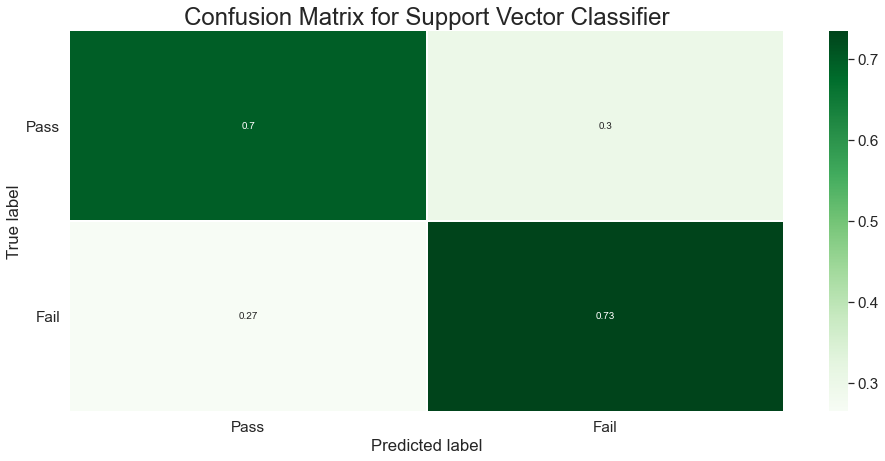

Fail refers to a failing score on the exam and who should receive a recommendation to take the exam preparation course.


In [28]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_svc)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Pass','Fail']
tick_marks = np.arange(len(class_names))+0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Support Vector Classifier', size=24)
plt.show()
print('Fail refers to a failing score on the exam and who should receive a recommendation to take the exam preparation course.')

In [29]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       943
           1       0.73      0.73      0.73      1047

    accuracy                           0.72      1990
   macro avg       0.72      0.72      0.72      1990
weighted avg       0.72      0.72      0.72      1990



### Logistic Regression

In [30]:
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train,y_train)
y_pred_log = log_model.predict(X_test)
y_pred_log

array([1, 1, 0, ..., 1, 1, 1])

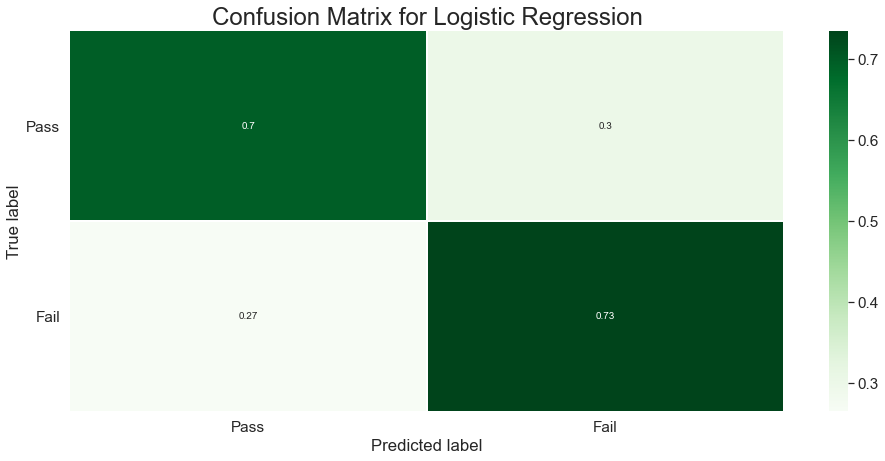

Fail refers to a failing score on the exam and who should receive a recommendation to take the exam preparation course.


In [31]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_log)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Pass','Fail']
tick_marks = np.arange(len(class_names))+0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression', size=24)
plt.show()
print('Fail refers to a failing score on the exam and who should receive a recommendation to take the exam preparation course.')

In [32]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       943
           1       0.73      0.73      0.73      1047

    accuracy                           0.72      1990
   macro avg       0.72      0.72      0.72      1990
weighted avg       0.72      0.72      0.72      1990



# RandomizedSearchCV
Scoring will be based on Recall to ensure the most students who are likely to fail are identified.

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm, datasets
from sklearn.svm import SVC

### Support Vector Classifier

In [34]:
params = {'C':[10, 1.0, 0.1, 0.01, 0.001],
          'max_iter':[1000, 10000],
          'tol':[0.0001, 0.001, 0.01, 1],
          'class_weight':['balanced',None],
          'loss':['squared_hinge','hinge']}

svc_tuned = LinearSVC(dual=False)

svc_cv = RandomizedSearchCV(svc_tuned, param_distributions=params, scoring='recall',
                        random_state=42, cv=10, verbose=3, n_jobs=-1)
model = svc_cv.fit(X_train, y_train)
best_params_svc = model.best_estimator_.get_params()
pprint(best_params_svc)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.1s


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 10000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 1,
 'verbose': 0}


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished


In [35]:
svc_tuned = LinearSVC().set_params(**best_params_svc) 

svc_tuned.fit(X_train,y_train)
y_pred_svcTuned = svc_tuned.predict(X_test)
print(accuracy_score(y_test, y_pred_svcTuned))
print(classification_report(y_test, y_pred_svcTuned))

0.714070351758794
              precision    recall  f1-score   support

           0       0.70      0.69      0.70       943
           1       0.73      0.74      0.73      1047

    accuracy                           0.71      1990
   macro avg       0.71      0.71      0.71      1990
weighted avg       0.71      0.71      0.71      1990



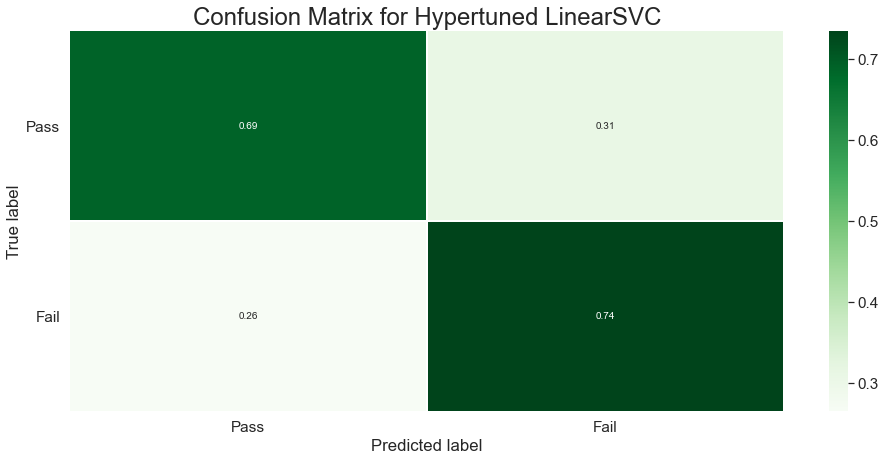

Fail refers to a failing score on the exam and who should receive a recommendation to take the exam preparation course.


In [36]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_svcTuned)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Pass','Fail']
tick_marks = np.arange(len(class_names))+0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Hypertuned LinearSVC', size=24)

plt.show()
print('Fail refers to a failing score on the exam and who should receive a recommendation to take the exam preparation course.')

### Logistic Regression

In [37]:
params = {'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
        'penalty':['none','l1','l2','elasticnet'],
        'C':[100,10,1,0.1,0.01]}

log_tuned = LogisticRegression(max_iter=10000, dual=False)

log_cv = RandomizedSearchCV(log_tuned, param_distributions=params, scoring='recall',
                        random_state=42, cv=5, verbose=3, n_jobs=-1)
model = log_cv.fit(X_train, y_train)

best_params_log = model.best_estimator_.get_params()
pprint(best_params_log)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.9s finished


In [38]:
log_tuned = LogisticRegression().set_params(**best_params_log)    

log_tuned.fit(X_train,y_train)
y_pred_logTuned = log_tuned.predict(X_test)
accuracy_score(y_test, y_pred_logTuned)
print(classification_report(y_test, y_pred_logTuned))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       943
           1       0.73      0.73      0.73      1047

    accuracy                           0.71      1990
   macro avg       0.71      0.71      0.71      1990
weighted avg       0.71      0.71      0.71      1990



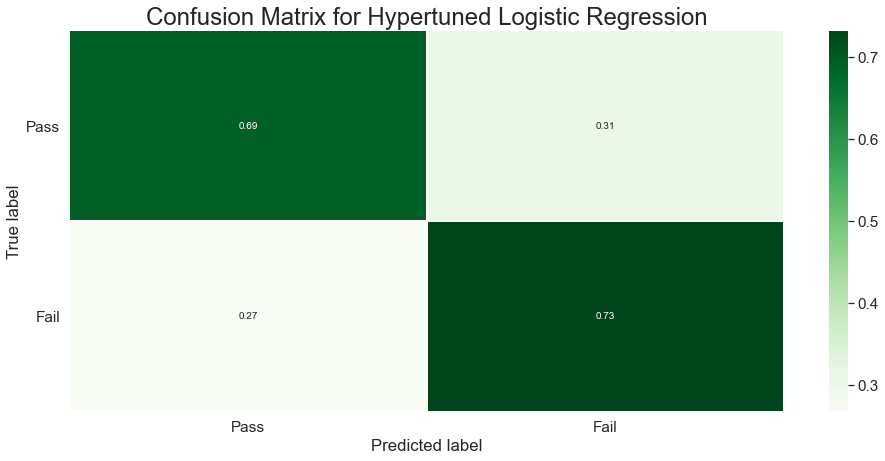

Fail refers to a failing score on the exam and who should receive a recommendation to take the exam preparation course.


In [39]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_logTuned)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Pass','Fail']
tick_marks = np.arange(len(class_names))+0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Hypertuned Logistic Regression', size=24)
plt.show()
print('Fail refers to a failing score on the exam and who should receive a recommendation to take the exam preparation course.')

# Best Model for Recall -- Hypertuned LinearSVC

In [40]:
params = {'C':[10, 1.0, 0.1, 0.01, 0.001],
          'max_iter':[1000, 10000],
          'tol':[0.0001, 0.001, 0.01, 1],
          'class_weight':['balanced',None],
          'loss':['squared_hinge','hinge']}

svc_tuned = LinearSVC(dual=False)

svc_cv = RandomizedSearchCV(svc_tuned, param_distributions=params, scoring='recall',
                        random_state=42, cv=10, verbose=3, n_jobs=-1)
model = svc_cv.fit(X_train, y_train)
best_params_svc = model.best_estimator_.get_params()
pprint(best_params_svc)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 10000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 1,
 'verbose': 0}


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


In [41]:
svc_tuned = LinearSVC().set_params(**best_params_svc) 

svc_tuned.fit(X_train,y_train)
y_pred_svcTuned = svc_tuned.predict(X_test)
print(accuracy_score(y_test, y_pred_svcTuned))
print()
print(classification_report(y_test, y_pred_svcTuned))

0.714070351758794

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       943
           1       0.73      0.74      0.73      1047

    accuracy                           0.71      1990
   macro avg       0.71      0.71      0.71      1990
weighted avg       0.71      0.71      0.71      1990



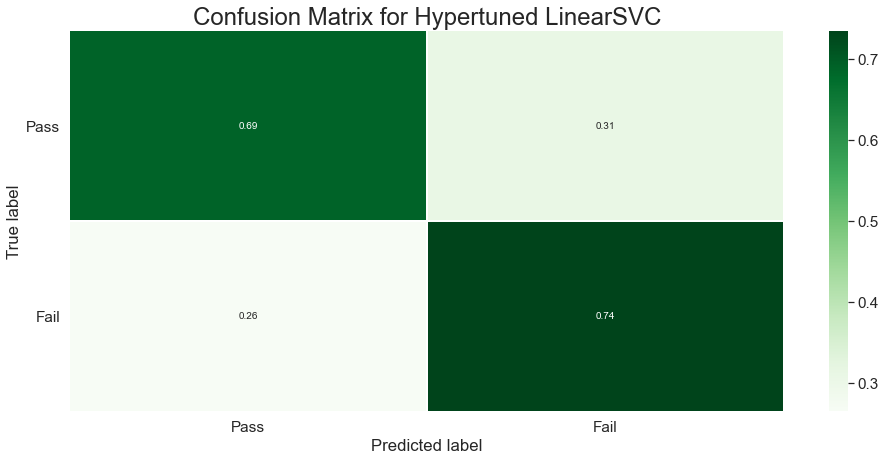

Fail refers to a failing score on the exam and who should receive a recommendation to take the exam preparation course.


In [42]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_svcTuned)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Pass','Fail']
tick_marks = np.arange(len(class_names))+0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Hypertuned LinearSVC', size=24)

plt.savefig(figures_folder+'/MODEL_hyptertuned_linearsvc.png')

plt.show()
print('Fail refers to a failing score on the exam and who should receive a recommendation to take the exam preparation course.')

In [43]:
coef_table = pd.DataFrame({"Feature Importance":list(X_train.columns)}).copy()
coef_table.insert(len(coef_table.columns),"Coefs",np.round(abs(svc_tuned.coef_.transpose()),2))
coef_table.set_index('Feature Importance',inplace=True)


In [44]:
coef_table = coef_table.sort_values('Coefs',ascending=False)
coef_table

,Coefs
Feature Importance,
test preparation course,0.50
gender_male,0.46
lunch_standard,0.46
parental level of education_some high school,0.25
parental level of education_master's degree,0.22
race/ethnicity_group E,0.20
race/ethnicity_group B,0.19
race/ethnicity_group C,0.13
parental level of education_bachelor's degree,0.13


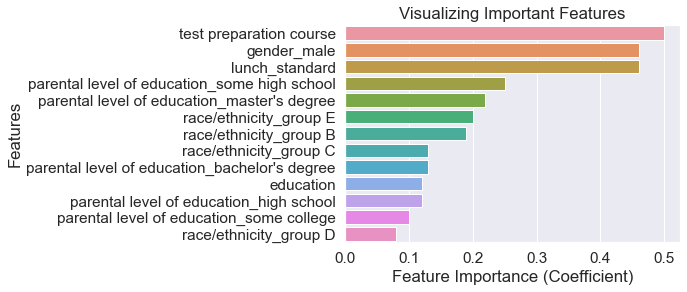

In [45]:
# Creating a bar plot
sns.barplot(x=coef_table['Coefs'], y=coef_table.index)
# Add labels to your graph
plt.xlabel('Feature Importance (Coefficient)')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.savefig(figures_folder+'/MODEL_feature_importance_linearsvc.png')

plt.show()